In [1]:
from mdgo.core import MdRun
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from MDAnalysis.analysis.distances import distance_array
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter

In [2]:
f_5_nopcm = MdRun("/Users/th/Downloads/os3_project/sila_phase2/f1s3mn/f_5_nopcm/f_5_nopcm.data",
                  "/Users/th/Downloads/os3_project/sila_phase2/f1s3mn/f_5_nopcm/f_5_nopcm_nvt.dcd",
                  "/Users/th/Downloads/os3_project/sila_phase2/f1s3mn/f_5_nopcm/f_5_nopcm_unwrapped_nvt.dcd",
                  800, 10, "f1s3mn 5% nopcm",
                  {"cation": "type 32", "anion": "type 30", "anion-F": "type 31", "EC": "type 2",
                   "DEC": "type 8", "EMC": "type 22", "os3": "type 33", "solvent":"type 2 or type 8 or type 22"})

f_5_pcm = MdRun("/Users/th/Downloads/os3_project/sila_phase2/f1s3mn/f_5_pcm/f_5_pcm.data",
                "/Users/th/Downloads/os3_project/sila_phase2/f1s3mn/f_5_pcm/f_5_pcm_nvt.dcd",
                "/Users/th/Downloads/os3_project/sila_phase2/f1s3mn/f_5_pcm/f_5_pcm_unwrapped_nvt.dcd",
                800, 10, "f1s3mn 5% pcm",
                {"cation": "type 32", "anion": "type 30", "anion-F": "type 31", "EC": "type 2",
                 "DEC": "type 8", "EMC": "type 22", "os3": "type 33", "solvent": "type 2 or type 8 or type 22"})

/Users/th/Documents/mdgo/mdgo/core.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


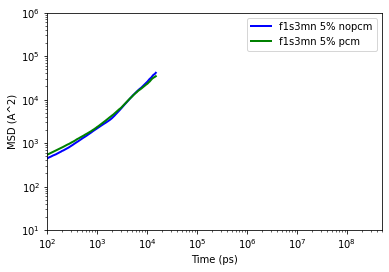

In [5]:
# start and end of fitting region selection (linear regime)
start = int(100/10)
end = int(15000/10)
f_5_nopcm.plot_cond_array(start, end, f_5_pcm)

In [6]:
f_5_nopcm.get_conductivity(start, end)

Conductivity of f1s3mn 5% nopcm: 1.1949339645004118 ± 0.00199898142021953 mS/cm


In [7]:
f_5_pcm.get_conductivity(start, end)

Conductivity of f1s3mn 5% pcm: 0.9995219781340863 ± 0.0008342976303584158 mS/cm


In [8]:
run_start = int(1000/10)
run_end = int(25000/10)

In [9]:
f_5_nopcm.rdf_integral(["anion", "anion-F", "EC", "DEC", "EMC", "os3"],
                        {"anion": 5, "anion-F": 3, "EC": 3, "DEC": 3, "EMC": 3, "os3": 3},
                        run_start, run_end)

,species in first solvation shell,f1s3mn 5% nopcm
0,anion,0.667451
1,anion-F,0.797885
2,EC,2.232259
3,DEC,1.226649
4,EMC,1.301394
5,os3,0.042851


In [10]:
f_5_pcm.rdf_integral(["anion", "anion-F", "EC", "DEC", "EMC", "os3"],
                     {"anion": 5, "anion-F": 3, "EC": 3, "DEC": 3, "EMC": 3, "os3": 3},
                     run_start, run_end)

,species in first solvation shell,f1s3mn 5% pcm
0,anion,0.610601
1,anion-F,0.734158
2,EC,2.165405
3,DEC,1.158006
4,EMC,1.297764
5,os3,0.215402


In [11]:
f_5_nopcm.coordination_one_species("os3", 3, run_start, run_end)

,Num of os3 within 3 Å,Percentage
0,0,95.7828%
1,1,4.1494%
2,2,0.0678%


In [12]:
f_5_pcm.coordination_one_species("os3", 3, run_start, run_end)

,Num of os3 within 3 Å,Percentage
0,0,79.6227%
1,1,19.2144%
2,2,1.1629%


In [13]:
f_5_nopcm.shell_simple("anion", 5, run_start, run_end)

,solvation structure,Percentage
0,ssip,45.3161%
1,cip,33.4353%
2,agg,21.2486%


In [14]:
f_5_pcm.shell_simple("anion", 5, run_start, run_end)

,solvation structure,Percentage
0,ssip,50.1727%
1,cip,31.7787%
2,agg,18.0486%
